In [78]:
# Load necessary libraries
library(readxl)
library(dplyr)
library(ggplot2)
library(tidyr)
library(summarytools)
library(corrplot)
library(DataExplorer)
library(psych)
library(caret)

In [79]:
# Load the Excel file
data <- read_excel("online_retail.xlsx")
print(data)

# A tibble: 541,909 × 8
   InvoiceNo StockCode Description        Quantity InvoiceDate         UnitPrice
   <chr>     <chr>     <chr>                 <dbl> <dttm>                  <dbl>
 1 536365    85123A    WHITE HANGING HEA…        6 2010-12-01 08:26:00      2.55
 2 536365    71053     WHITE METAL LANTE…        6 2010-12-01 08:26:00      3.39
 3 536365    84406B    CREAM CUPID HEART…        8 2010-12-01 08:26:00      2.75
 4 536365    84029G    KNITTED UNION FLA…        6 2010-12-01 08:26:00      3.39
 5 536365    84029E    RED WOOLLY HOTTIE…        6 2010-12-01 08:26:00      3.39
 6 536365    22752     SET 7 BABUSHKA NE…        2 2010-12-01 08:26:00      7.65
 7 536365    21730     GLASS STAR FROSTE…        6 2010-12-01 08:26:00      4.25
 8 536366    22633     HAND WARMER UNION…        6 2010-12-01 08:28:00      1.85
 9 536366    22632     HAND WARMER RED P…        6 2010-12-01 08:28:00      1.85
10 536367    84879     ASSORTED COLOUR B…       32 2010-12-01 08:34:00      1.69
# ℹ 

In [80]:
# View basic structure and summary
str(data)
summary(data)
# dfSummary(data)

tibble [541,909 × 8] (S3: tbl_df/tbl/data.frame)
 $ InvoiceNo  : chr [1:541909] "536365" "536365" "536365" "536365" ...
 $ StockCode  : chr [1:541909] "85123A" "71053" "84406B" "84029G" ...
 $ Description: chr [1:541909] "WHITE HANGING HEART T-LIGHT HOLDER" "WHITE METAL LANTERN" "CREAM CUPID HEARTS COAT HANGER" "KNITTED UNION FLAG HOT WATER BOTTLE" ...
 $ Quantity   : num [1:541909] 6 6 8 6 6 2 6 6 6 32 ...
 $ InvoiceDate: POSIXct[1:541909], format: "2010-12-01 08:26:00" "2010-12-01 08:26:00" ...
 $ UnitPrice  : num [1:541909] 2.55 3.39 2.75 3.39 3.39 7.65 4.25 1.85 1.85 1.69 ...
 $ CustomerID : num [1:541909] 17850 17850 17850 17850 17850 ...
 $ Country    : chr [1:541909] "United Kingdom" "United Kingdom" "United Kingdom" "United Kingdom" ...


  InvoiceNo          StockCode         Description           Quantity        
 Length:541909      Length:541909      Length:541909      Min.   :-80995.00  
 Class :character   Class :character   Class :character   1st Qu.:     1.00  
 Mode  :character   Mode  :character   Mode  :character   Median :     3.00  
                                                          Mean   :     9.55  
                                                          3rd Qu.:    10.00  
                                                          Max.   : 80995.00  
                                                                             
  InvoiceDate                       UnitPrice           CustomerID    
 Min.   :2010-12-01 08:26:00.00   Min.   :-11062.06   Min.   :12346   
 1st Qu.:2011-03-28 11:34:00.00   1st Qu.:     1.25   1st Qu.:13953   
 Median :2011-07-19 17:17:00.00   Median :     2.08   Median :15152   
 Mean   :2011-07-04 13:34:57.16   Mean   :     4.61   Mean   :15288   
 3rd Qu.:2011-10-19 1

In [81]:
# Drop unnecessary columns
df <- data[, !(names(data) %in% c("StockCode", "InvoiceDate", "CustomerID"))]
print(df)

# A tibble: 541,909 × 5
   InvoiceNo Description                         Quantity UnitPrice Country     
   <chr>     <chr>                                  <dbl>     <dbl> <chr>       
 1 536365    WHITE HANGING HEART T-LIGHT HOLDER         6      2.55 United King…
 2 536365    WHITE METAL LANTERN                        6      3.39 United King…
 3 536365    CREAM CUPID HEARTS COAT HANGER             8      2.75 United King…
 4 536365    KNITTED UNION FLAG HOT WATER BOTTLE        6      3.39 United King…
 5 536365    RED WOOLLY HOTTIE WHITE HEART.             6      3.39 United King…
 6 536365    SET 7 BABUSHKA NESTING BOXES               2      7.65 United King…
 7 536365    GLASS STAR FROSTED T-LIGHT HOLDER          6      4.25 United King…
 8 536366    HAND WARMER UNION JACK                     6      1.85 United King…
 9 536366    HAND WARMER RED POLKA DOT                  6      1.85 United King…
10 536367    ASSORTED COLOUR BIRD ORNAMENT             32      1.69 United King…
# ℹ 

In [82]:
# Check for missing values
missing_data <- sapply(df, function(x) sum(is.na(x)))
print(missing_data)

  InvoiceNo Description    Quantity   UnitPrice     Country 
          0        1454           0           0           0 


In [83]:
# View basic structure and summary
str(df)
summary(df)

tibble [541,909 × 5] (S3: tbl_df/tbl/data.frame)
 $ InvoiceNo  : chr [1:541909] "536365" "536365" "536365" "536365" ...
 $ Description: chr [1:541909] "WHITE HANGING HEART T-LIGHT HOLDER" "WHITE METAL LANTERN" "CREAM CUPID HEARTS COAT HANGER" "KNITTED UNION FLAG HOT WATER BOTTLE" ...
 $ Quantity   : num [1:541909] 6 6 8 6 6 2 6 6 6 32 ...
 $ UnitPrice  : num [1:541909] 2.55 3.39 2.75 3.39 3.39 7.65 4.25 1.85 1.85 1.69 ...
 $ Country    : chr [1:541909] "United Kingdom" "United Kingdom" "United Kingdom" "United Kingdom" ...


  InvoiceNo         Description           Quantity           UnitPrice        
 Length:541909      Length:541909      Min.   :-80995.00   Min.   :-11062.06  
 Class :character   Class :character   1st Qu.:     1.00   1st Qu.:     1.25  
 Mode  :character   Mode  :character   Median :     3.00   Median :     2.08  
                                       Mean   :     9.55   Mean   :     4.61  
                                       3rd Qu.:    10.00   3rd Qu.:     4.13  
                                       Max.   : 80995.00   Max.   : 38970.00  
   Country         
 Length:541909     
 Class :character  
 Mode  :character  
                   
                   
                   

In [84]:
data_clean <- df %>%
  filter(Quantity >= 1, UnitPrice >= 1)

str(data_clean)

tibble [419,211 × 5] (S3: tbl_df/tbl/data.frame)
 $ InvoiceNo  : chr [1:419211] "536365" "536365" "536365" "536365" ...
 $ Description: chr [1:419211] "WHITE HANGING HEART T-LIGHT HOLDER" "WHITE METAL LANTERN" "CREAM CUPID HEARTS COAT HANGER" "KNITTED UNION FLAG HOT WATER BOTTLE" ...
 $ Quantity   : num [1:419211] 6 6 8 6 6 2 6 6 6 32 ...
 $ UnitPrice  : num [1:419211] 2.55 3.39 2.75 3.39 3.39 7.65 4.25 1.85 1.85 1.69 ...
 $ Country    : chr [1:419211] "United Kingdom" "United Kingdom" "United Kingdom" "United Kingdom" ...


In [85]:
data_clean <- data_clean[data_clean$Description != "DOTCOM POSTAGE", ]
data_clean <- data_clean[data_clean$Description != "POSTAGE", ]
str(data_clean)

tibble [417,382 × 5] (S3: tbl_df/tbl/data.frame)
 $ InvoiceNo  : chr [1:417382] "536365" "536365" "536365" "536365" ...
 $ Description: chr [1:417382] "WHITE HANGING HEART T-LIGHT HOLDER" "WHITE METAL LANTERN" "CREAM CUPID HEARTS COAT HANGER" "KNITTED UNION FLAG HOT WATER BOTTLE" ...
 $ Quantity   : num [1:417382] 6 6 8 6 6 2 6 6 6 32 ...
 $ UnitPrice  : num [1:417382] 2.55 3.39 2.75 3.39 3.39 7.65 4.25 1.85 1.85 1.69 ...
 $ Country    : chr [1:417382] "United Kingdom" "United Kingdom" "United Kingdom" "United Kingdom" ...


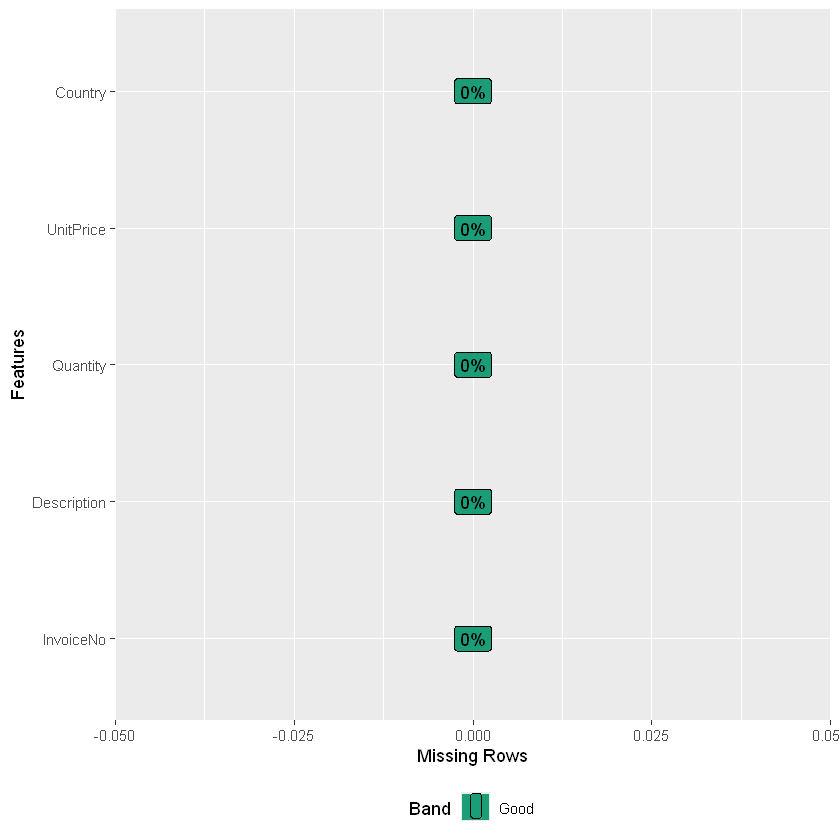

In [86]:
# Visualize missing data
plot_missing(data_clean)

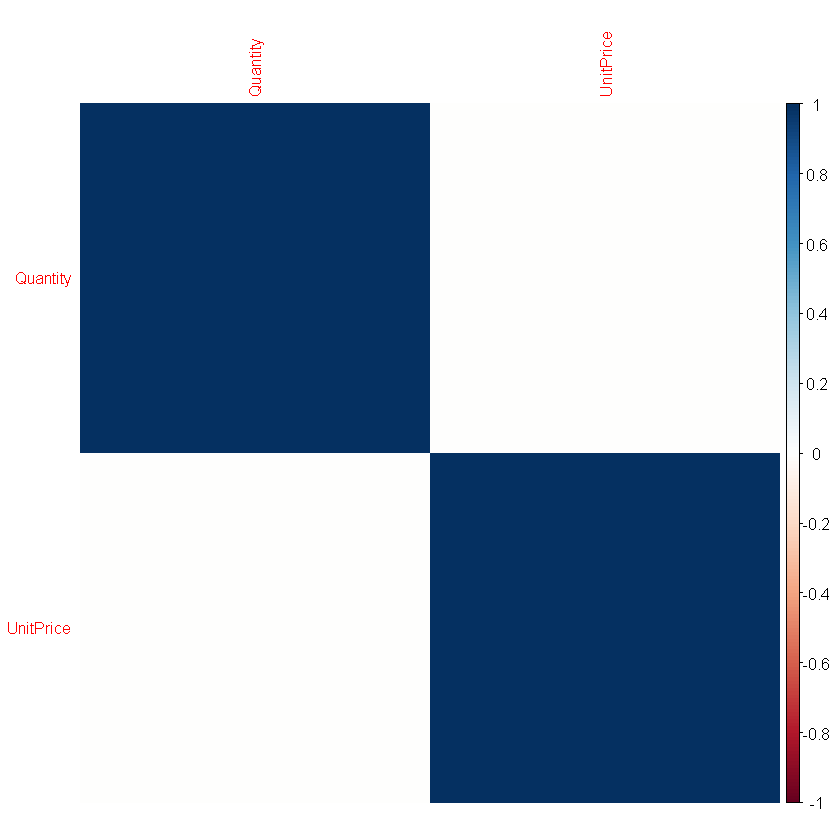

In [87]:
# Correlation analysis
numeric_data <- data_clean %>% select(where(is.numeric)) %>% na.omit()
cor_matrix <- cor(numeric_data)
corrplot(cor_matrix, method = "color", tl.cex = 0.8)

In [88]:
# Quick overview
introduce(data_clean)

rows,columns,discrete_columns,continuous_columns,all_missing_columns,total_missing_values,complete_rows,total_observations,memory_usage
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
417382,5,3,2,0,0,417382,2086910,18092336


In [89]:
write.csv(data_clean, "data_final.csv", row.names = FALSE)

In [90]:
country_count <- data_clean %>%
  group_by(Country) %>%
  summarise(Transactions = n()) %>%
  arrange(desc(Transactions))

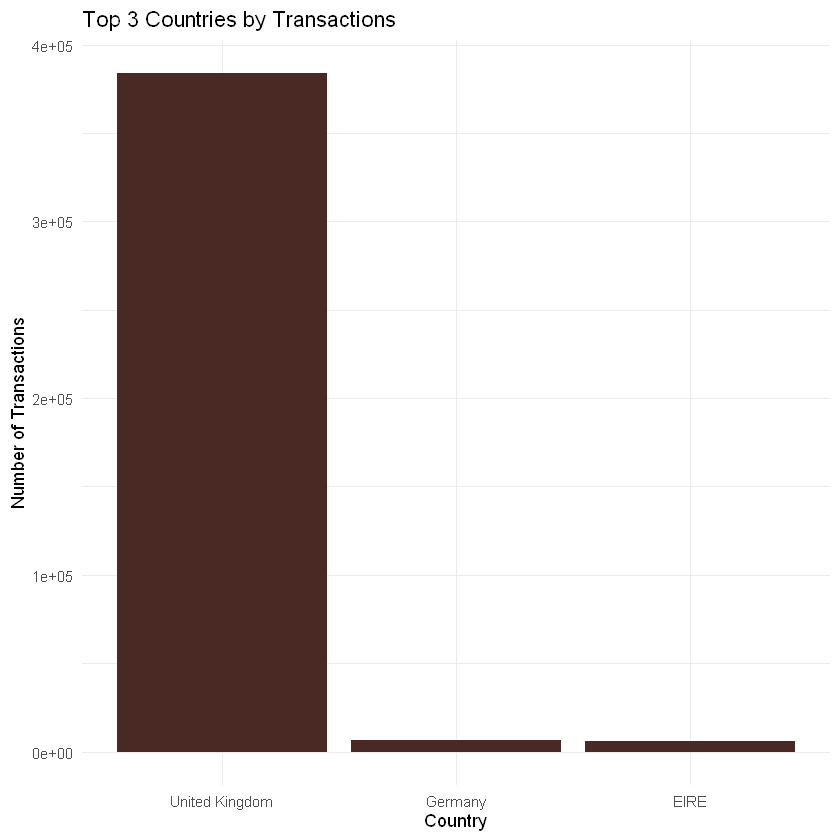

In [91]:
top3 <- head(country_count, 3)

ggplot(top3, aes(x = reorder(Country, -Transactions), y = Transactions)) +
  geom_bar(stat = "identity", fill = "#4a2924") +
  labs(title = "Top 3 Countries by Transactions",
       x = "Country",
       y = "Number of Transactions") +
  theme_minimal()

In [104]:
uk_data <- data_clean %>%
  filter(Country == "United Kingdom") %>%
  select(-Country, -Quantity, -UnitPrice)

ger_data <- data_clean %>%
  filter(Country == "Germany") %>%
  select(-Country, -Quantity, -UnitPrice)

fra_data <- data_clean %>%
  filter(Country == "France") %>%
  select(-Country, -Quantity, -UnitPrice)


In [93]:
print(uk_data)

# A tibble: 383,741 × 2
   InvoiceNo Description                        
   <chr>     <chr>                              
 1 536365    WHITE HANGING HEART T-LIGHT HOLDER 
 2 536365    WHITE METAL LANTERN                
 3 536365    CREAM CUPID HEARTS COAT HANGER     
 4 536365    KNITTED UNION FLAG HOT WATER BOTTLE
 5 536365    RED WOOLLY HOTTIE WHITE HEART.     
 6 536365    SET 7 BABUSHKA NESTING BOXES       
 7 536365    GLASS STAR FROSTED T-LIGHT HOLDER  
 8 536366    HAND WARMER UNION JACK             
 9 536366    HAND WARMER RED POLKA DOT          
10 536367    ASSORTED COLOUR BIRD ORNAMENT      
# ℹ 383,731 more rows


In [94]:
print(ger_data)

# A tibble: 6,549 × 2
   InvoiceNo Description                        
   <chr>     <chr>                              
 1 536527    SET OF 6 T-LIGHTS SANTA            
 2 536527    ROTATING SILVER ANGELS T-LIGHT HLDR
 3 536527    5 HOOK HANGER MAGIC TOADSTOOL      
 4 536527    3 HOOK HANGER MAGIC GARDEN         
 5 536527    5 HOOK HANGER RED MAGIC TOADSTOOL  
 6 536527    JUMBO BAG WOODLAND ANIMALS         
 7 536527    JUMBO BAG OWLS                     
 8 536527    HOT WATER BOTTLE BABUSHKA          
 9 536527    HOMEMADE JAM SCENTED CANDLES       
10 536527    CHILDREN'S CIRCUS PARADE MUG       
# ℹ 6,539 more rows


In [95]:
print(fra_data)

# A tibble: 6,082 × 2
   InvoiceNo Description                       
   <chr>     <chr>                             
 1 536370    ALARM CLOCK BAKELIKE PINK         
 2 536370    ALARM CLOCK BAKELIKE RED          
 3 536370    ALARM CLOCK BAKELIKE GREEN        
 4 536370    VINTAGE HEADS AND TAILS CARD GAME 
 5 536370    SET/2 RED RETROSPOT TEA TOWELS    
 6 536370    ROUND SNACK BOXES SET OF4 WOODLAND
 7 536370    SPACEBOY LUNCH BOX                
 8 536370    LUNCH BOX I LOVE LONDON           
 9 536370    CIRCUS PARADE LUNCH BOX           
10 536370    RED TOADSTOOL LED NIGHT LIGHT     
# ℹ 6,072 more rows


In [96]:
library(arules)
library(arulesViz)

In [97]:
# Convert InvoiceNo to character (required by arules)
uk_data$InvoiceNo <- as.character(uk_data$InvoiceNo)

# Convert to transactions using split
transactions_list <- split(uk_data$Description, uk_data$InvoiceNo)

# Convert to "transactions" object
trans <- as(transactions_list, "transactions")

Warning message in asMethod(object):
"removing duplicated items in transactions"


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.7    0.1    1 none FALSE            TRUE       5   0.005      1
 maxlen target  ext
      3  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 87 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[3606 item(s), 17591 transaction(s)] done [0.08s].
sorting and recoding items ... [1172 item(s)] done [0.01s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3

Warning message in apriori(trans, parameter = list(supp = 0.005, conf = 0.7, maxlen = 3)):
"Mining stopped (maxlen reached). Only patterns up to a length of 3 returned!"


 done [0.05s].
writing ... [2834 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



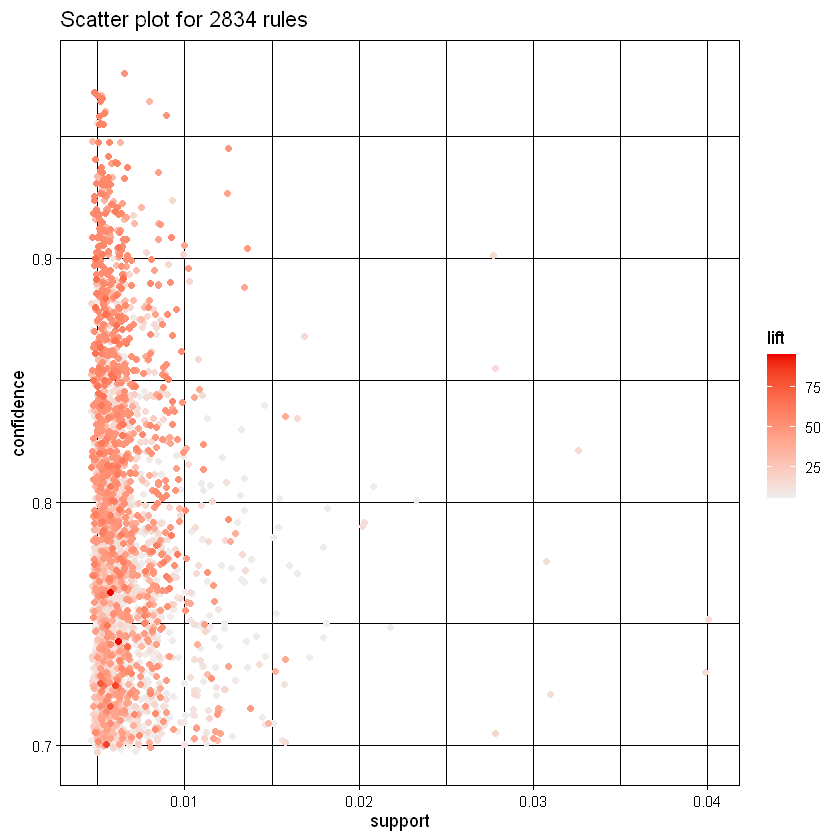

In [98]:
rules <- apriori(trans, parameter = list(supp = 0.005, conf = 0.7, maxlen = 3))
rules <- subset(rules, lift > 2)
plot(rules)

In [99]:
inspect(head(sort(rules, by = "count", decreasing = TRUE), 10))

     lhs                                     rhs                                   support confidence   coverage      lift count
[1]  {ROSES REGENCY TEACUP AND SAUCER}    => {GREEN REGENCY TEACUP AND SAUCER}  0.03979308  0.7322176 0.05434597 13.820214   700
[2]  {GREEN REGENCY TEACUP AND SAUCER}    => {ROSES REGENCY TEACUP AND SAUCER}  0.03979308  0.7510730 0.05298164 13.820214   700
[3]  {PINK REGENCY TEACUP AND SAUCER}     => {GREEN REGENCY TEACUP AND SAUCER}  0.03274402  0.8205128 0.03990677 15.486739   576
[4]  {PINK REGENCY TEACUP AND SAUCER}     => {ROSES REGENCY TEACUP AND SAUCER}  0.03098175  0.7763533 0.03990677 14.285388   545
[5]  {GARDENERS KNEELING PAD CUP OF TEA}  => {GARDENERS KNEELING PAD KEEP CALM} 0.03075436  0.7213333 0.04263544 14.130261   541
[6]  {PINK REGENCY TEACUP AND SAUCER,                                                                                           
      ROSES REGENCY TEACUP AND SAUCER}    => {GREEN REGENCY TEACUP AND SAUCER}  0.02796885  0.902

Warning message in asMethod(object):
"removing duplicated items in transactions"


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.6    0.1    1 none FALSE            TRUE       5    0.02      1
 maxlen target  ext
      3  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 8 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[1229 item(s), 447 transaction(s)] done [0.00s].
sorting and recoding items ... [229 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3

Warning message in apriori(ger_trans, parameter = list(supp = 0.02, conf = 0.6, :
"Mining stopped (maxlen reached). Only patterns up to a length of 3 returned!"


 done [0.00s].
writing ... [170 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



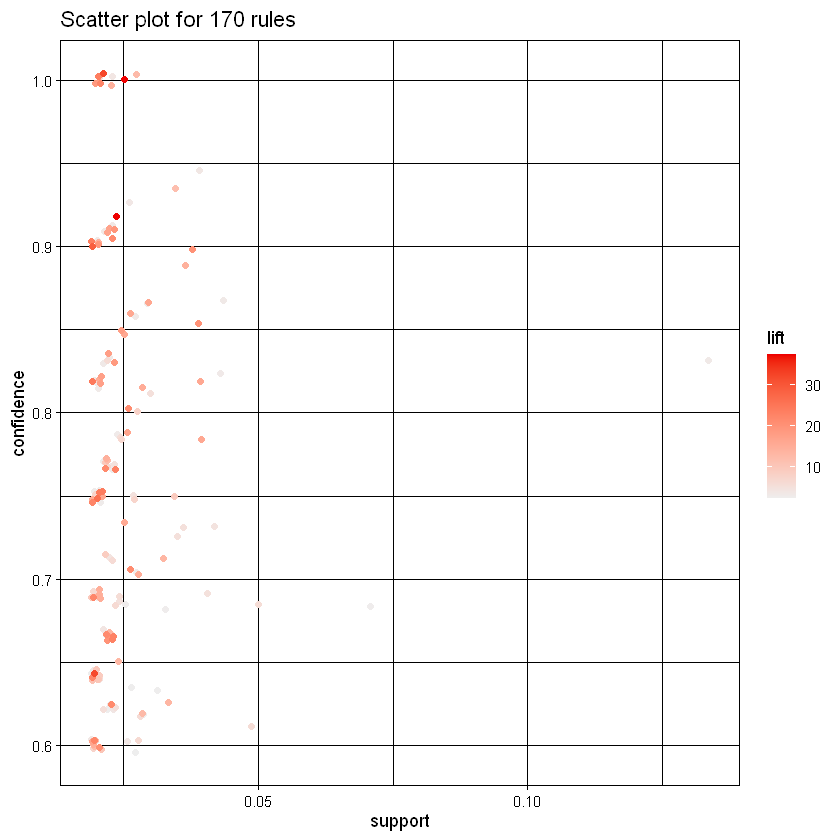

In [100]:
# Convert InvoiceNo to character (required by arules)
ger_data$InvoiceNo <- as.character(ger_data$InvoiceNo)

# Convert to transactions using split
ger_transactions_list <- split(ger_data$Description, ger_data$InvoiceNo)

# Convert to "transactions" object
ger_trans <- as(ger_transactions_list, "transactions")

ger_rules <- apriori(ger_trans, parameter = list(supp = 0.02, conf = 0.6, maxlen = 3))

plot(ger_rules)

In [101]:
inspect(head(sort(ger_rules, by = "count", decreasing = TRUE), 10))

     lhs                                     rhs                                     support confidence   coverage      lift count
[1]  {ROUND SNACK BOXES SET OF 4 FRUITS}  => {ROUND SNACK BOXES SET OF4 WOODLAND} 0.13422819  0.8333333 0.16107383  3.325893    60
[2]  {SPACEBOY LUNCH BOX}                 => {ROUND SNACK BOXES SET OF4 WOODLAND} 0.07158837  0.6808511 0.10514541  2.717325    32
[3]  {PLASTERS IN TIN STRONGMAN}          => {PLASTERS IN TIN CIRCUS PARADE}      0.04921700  0.6875000 0.07158837  5.798349    22
[4]  {JUMBO BAG RED RETROSPOT}            => {JUMBO BAG WOODLAND ANIMALS}         0.04921700  0.6111111 0.08053691  5.938406    22
[5]  {PLASTERS IN TIN CIRCUS PARADE,                                                                                              
      ROUND SNACK BOXES SET OF 4 FRUITS}  => {ROUND SNACK BOXES SET OF4 WOODLAND} 0.04250559  0.8260870 0.05145414  3.296972    19
[6]  {PLASTERS IN TIN CIRCUS PARADE,                                               

Warning message in asMethod(object):
"removing duplicated items in transactions"


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.7    0.1    1 none FALSE            TRUE       5    0.02      1
 maxlen target  ext
      3  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 7 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[1152 item(s), 385 transaction(s)] done [0.00s].
sorting and recoding items ... [212 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3

Warning message in apriori(fra_trans, parameter = list(supp = 0.02, conf = 0.7, :
"Mining stopped (maxlen reached). Only patterns up to a length of 3 returned!"


 done [0.00s].
writing ... [421 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



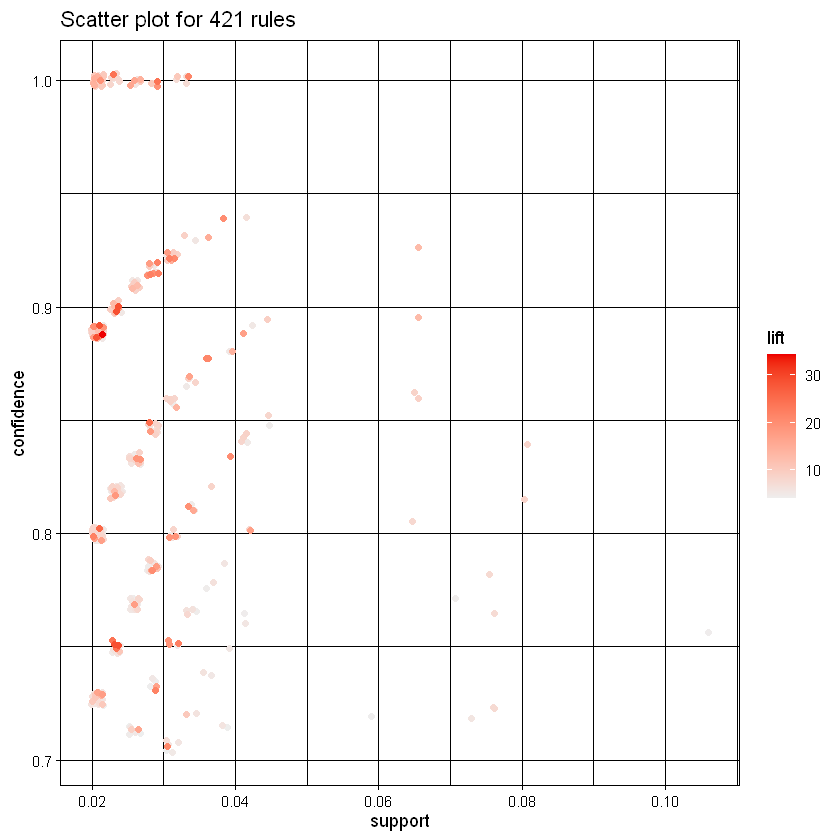

In [102]:
# Convert InvoiceNo to character (required by arules)
fra_data$InvoiceNo <- as.character(fra_data$InvoiceNo)

# Convert to transactions using split
fra_transactions_list <- split(fra_data$Description, fra_data$InvoiceNo)

# Convert to "transactions" object
fra_trans <- as(fra_transactions_list, "transactions")

fra_rules <- apriori(fra_trans, parameter = list(supp = 0.02, conf = 0.7, maxlen = 3))
fra_rules <- subset(fra_rules, lift > 1.2)

plot(fra_rules)

In [103]:
inspect(head(sort(fra_rules, by = "count", decreasing = TRUE), 10))

     lhs                                 rhs                                   support confidence   coverage      lift count
[1]  {PLASTERS IN TIN SPACEBOY}       => {PLASTERS IN TIN WOODLAND ANIMALS} 0.10649351  0.7592593 0.14025974  4.362908    41
[2]  {ALARM CLOCK BAKELIKE GREEN}     => {ALARM CLOCK BAKELIKE RED}         0.08051948  0.8157895 0.09870130  8.488620    31
[3]  {ALARM CLOCK BAKELIKE RED}       => {ALARM CLOCK BAKELIKE GREEN}       0.08051948  0.8378378 0.09610390  8.488620    31
[4]  {ALARM CLOCK BAKELIKE PINK}      => {ALARM CLOCK BAKELIKE GREEN}       0.07532468  0.7250000 0.10389610  7.345395    29
[5]  {ALARM CLOCK BAKELIKE GREEN}     => {ALARM CLOCK BAKELIKE PINK}        0.07532468  0.7631579 0.09870130  7.345395    29
[6]  {ALARM CLOCK BAKELIKE PINK}      => {ALARM CLOCK BAKELIKE RED}         0.07532468  0.7250000 0.10389610  7.543919    29
[7]  {ALARM CLOCK BAKELIKE RED}       => {ALARM CLOCK BAKELIKE PINK}        0.07532468  0.7837838 0.09610390  7.543919    29
